In [1]:
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim

torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]

In [4]:
#unsqueezed the tensor here
t_c = torch.tensor(t_c).unsqueeze(1) # <1>
t_u = torch.tensor(t_u).unsqueeze(1) # <1>
t_u.shape

/var/folders/6p/3xvwl7h96r95nst0vx2k2n3h0000gn/T/ipykernel_55282/1229789013.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_c = torch.tensor(t_c).unsqueeze(1) # <1>
/var/folders/6p/3xvwl7h96r95nst0vx2k2n3h0000gn/T/ipykernel_55282/1229789013.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_u = torch.tensor(t_u).unsqueeze(1) # <1>


torch.Size([11, 1, 1])

In [5]:
t_u

tensor([[[35.7000]],

        [[55.9000]],

        [[58.2000]],

        [[81.9000]],

        [[56.3000]],

        [[48.9000]],

        [[33.9000]],

        [[21.8000]],

        [[48.4000]],

        [[60.4000]],

        [[68.4000]]])

In [6]:
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

train_indices, val_indices

(tensor([ 3,  2,  4,  6,  1,  5, 10,  0,  8]), tensor([9, 7]))

In [7]:
t_u_train = t_u[train_indices]
t_c_train = t_c[train_indices]

t_u_val = t_u[val_indices]
t_c_val = t_c[val_indices]

t_un_train = 0.1 * t_u_train
t_un_val = 0.1 * t_u_val

In [8]:
import torch.nn as nn

linear_model = nn.Linear(1, 1) # <1>
linear_model(t_un_val)

tensor([[[-3.9021]],

        [[-1.6284]]], grad_fn=<ViewBackward0>)

In [9]:
linear_model.weight

Parameter containing:
tensor([[-0.5890]], requires_grad=True)

In [10]:
linear_model.bias

Parameter containing:
tensor([-0.3443], requires_grad=True)

In [11]:
x = torch.ones(1)
linear_model(x)

tensor([-0.9333], grad_fn=<ViewBackward0>)

In [12]:
x = torch.ones(10, 1)
linear_model(x)

tensor([[-0.9333],
        [-0.9333],
        [-0.9333],
        [-0.9333],
        [-0.9333],
        [-0.9333],
        [-0.9333],
        [-0.9333],
        [-0.9333],
        [-0.9333]], grad_fn=<AddmmBackward0>)

In [14]:
#call to .SGD
linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(
    linear_model.parameters(), # <2>
    lr=1e-2)

In [15]:
linear_model.parameters()

<generator object Module.parameters at 0x13dbb9d90>

In [16]:
list(linear_model.parameters())

[Parameter containing:
 tensor([[-0.3431]], requires_grad=True),
 Parameter containing:
 tensor([-0.7661], requires_grad=True)]

In [17]:
def training_loop(n_epochs, optimizer, model, loss_fn, t_u_train, t_u_val,
                  t_c_train, t_c_val):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_u_train) # <1>
        loss_train = loss_fn(t_p_train, t_c_train)

        t_p_val = model(t_u_val) # <1>
        loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()

        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},"
                  f" Validation loss {loss_val.item():.4f}")


In [18]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

linear_model = nn.Linear(1, 1) # <1>
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = loss_fn,
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 81.0928, Validation loss 43.4925
Epoch 1000, Training loss 4.6841, Validation loss 2.6787
Epoch 2000, Training loss 2.7101, Validation loss 4.0919
Epoch 3000, Training loss 2.5464, Validation loss 5.7300

Parameter containing:
tensor([[5.6445]], requires_grad=True)
Parameter containing:
tensor([-18.7174], requires_grad=True)


In [19]:
linear_model = nn.Linear(1, 1)
optimizer = optim.SGD(linear_model.parameters(), lr=1e-2)

training_loop(
    n_epochs = 3000, 
    optimizer = optimizer,
    model = linear_model,
    loss_fn = nn.MSELoss(), # <1>
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

print()
print(linear_model.weight)
print(linear_model.bias)

Epoch 1, Training loss 82.7513, Validation loss 43.5072
Epoch 1000, Training loss 4.6585, Validation loss 2.6630
Epoch 2000, Training loss 2.7080, Validation loss 4.1033
Epoch 3000, Training loss 2.5462, Validation loss 5.7346

Parameter containing:
tensor([[5.6450]], requires_grad=True)
Parameter containing:
tensor([-18.7203], requires_grad=True)


In [20]:
seq_model = nn.Sequential(
            nn.Linear(1, 13), # <1>
            nn.Tanh(),
            nn.Linear(13, 1)) # <2>
seq_model

Sequential(
  (0): Linear(in_features=1, out_features=13, bias=True)
  (1): Tanh()
  (2): Linear(in_features=13, out_features=1, bias=True)
)

In [21]:
[param.shape for param in seq_model.parameters()]

[torch.Size([13, 1]), torch.Size([13]), torch.Size([1, 13]), torch.Size([1])]

In [22]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

0.weight torch.Size([13, 1])
0.bias torch.Size([13])
2.weight torch.Size([1, 13])
2.bias torch.Size([1])


In [23]:
from collections import OrderedDict

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, 8)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(8, 1))
]))

seq_model

Sequential(
  (hidden_linear): Linear(in_features=1, out_features=8, bias=True)
  (hidden_activation): Tanh()
  (output_linear): Linear(in_features=8, out_features=1, bias=True)
)

In [24]:
for name, param in seq_model.named_parameters():
    print(name, param.shape)

hidden_linear.weight torch.Size([8, 1])
hidden_linear.bias torch.Size([8])
output_linear.weight torch.Size([1, 8])
output_linear.bias torch.Size([1])


In [25]:
seq_model.output_linear.bias

Parameter containing:
tensor([0.0361], requires_grad=True)

In [26]:
optimizer = optim.SGD(seq_model.parameters(), lr=1e-3) # <1>

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)
    
print('output', seq_model(t_un_val))
print('answer', t_c_val)
print('hidden', seq_model.hidden_linear.weight.grad)

Epoch 1, Training loss 209.2015, Validation loss 93.2605
Epoch 1000, Training loss 4.6149, Validation loss 4.7158
Epoch 2000, Training loss 2.7241, Validation loss 10.6252
Epoch 3000, Training loss 1.9080, Validation loss 9.3481
Epoch 4000, Training loss 1.7226, Validation loss 9.2482
Epoch 5000, Training loss 1.6197, Validation loss 9.4570
output tensor([[[15.2518]],

        [[-1.3954]]], grad_fn=<ViewBackward0>)
answer tensor([[[13.]],

        [[-4.]]])
hidden tensor([[-6.6710e-04],
        [ 1.4688e+01],
        [ 8.7813e+00],
        [ 2.8864e-04],
        [ 3.2873e-01],
        [ 5.3277e-01],
        [ 1.3569e+01],
        [ 1.3976e+01]])


ValueError: x and y can be no greater than 2D, but have shapes (11, 1, 1) and (11, 1, 1)

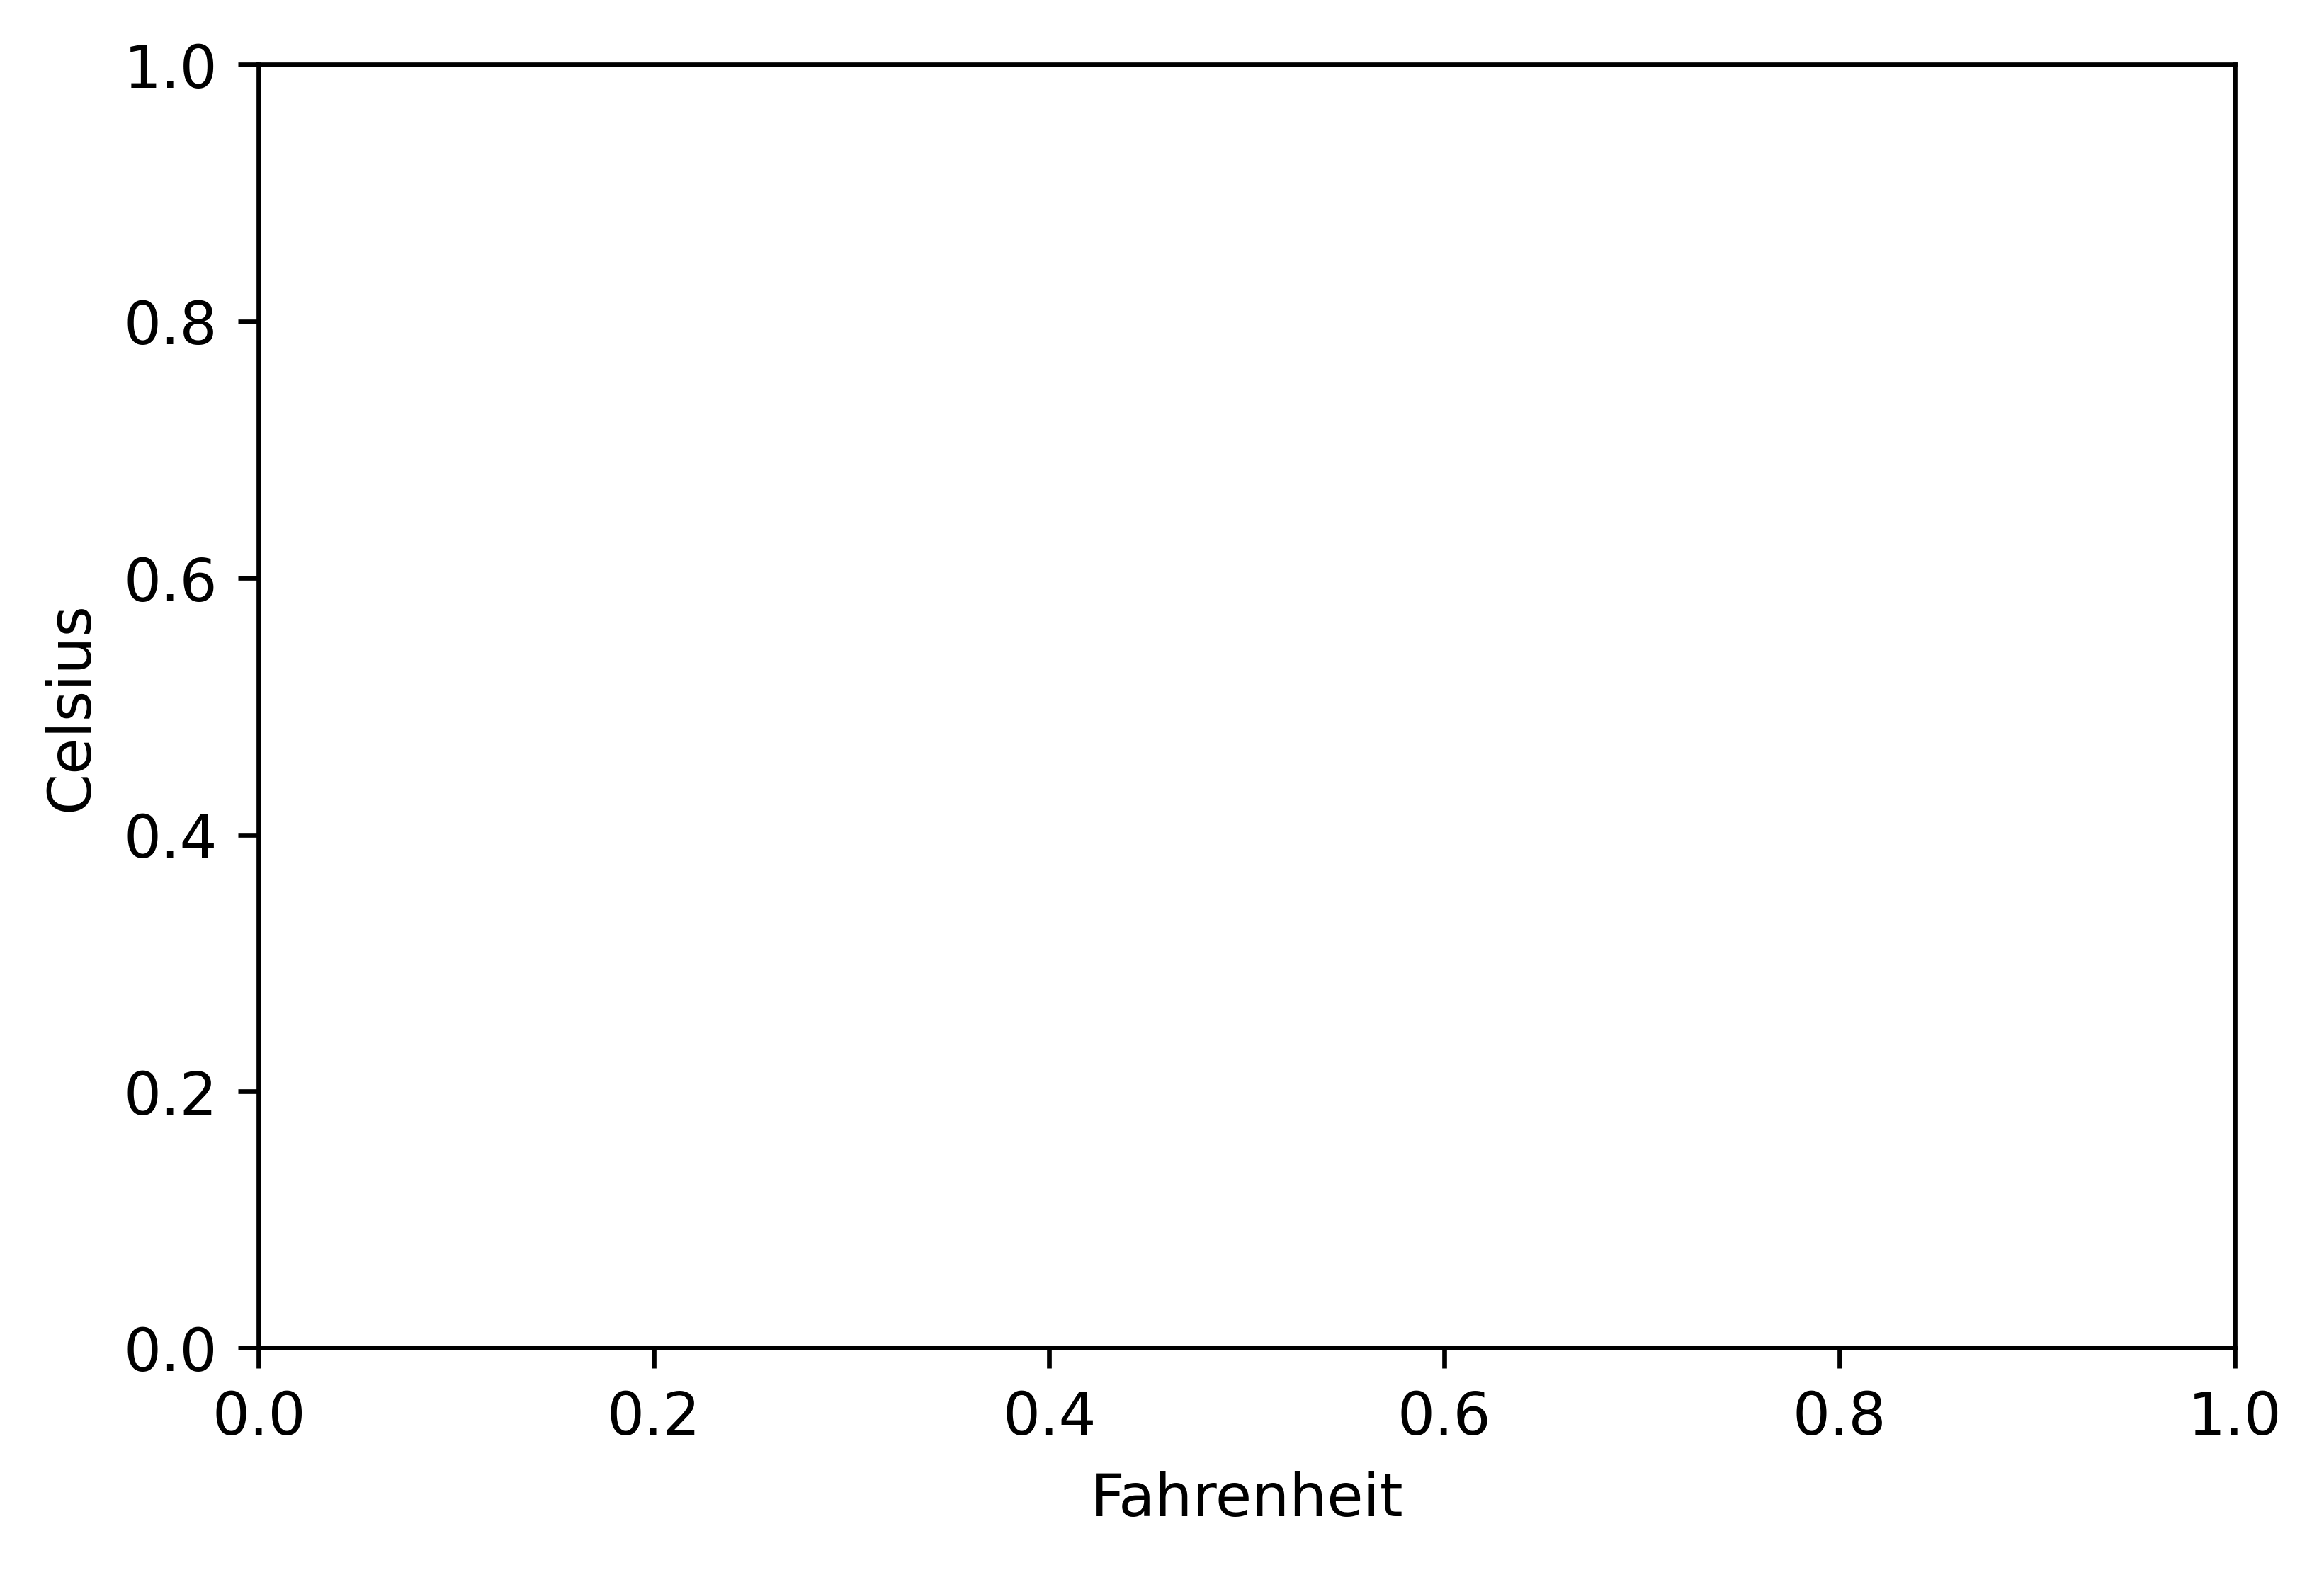

In [27]:
from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=600)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')


Epoch 1, Training loss 239.3185, Validation loss 80.4137
Epoch 1000, Training loss 59.1175, Validation loss 16.5412
Epoch 2000, Training loss 37.3363, Validation loss 8.7919
Epoch 3000, Training loss 20.9047, Validation loss 3.1193
Epoch 4000, Training loss 11.6102, Validation loss 2.2052
Epoch 5000, Training loss 7.0425, Validation loss 3.6139


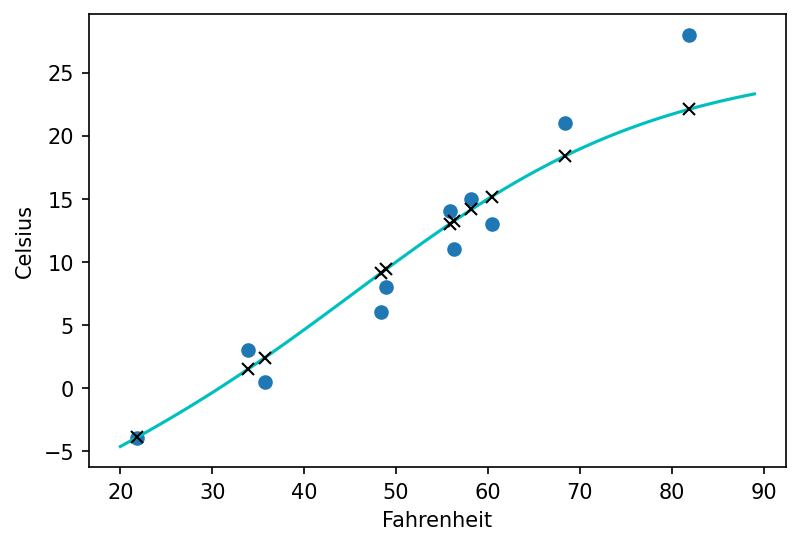

In [ ]:
# Exercises here!

neuron_count = 20

seq_model = nn.Sequential(OrderedDict([
    ('hidden_linear', nn.Linear(1, neuron_count)),
    ('hidden_activation', nn.Tanh()),
    ('output_linear', nn.Linear(neuron_count, 1))
]))

optimizer = optim.SGD(seq_model.parameters(), lr=1e-4)

training_loop(
    n_epochs = 5000, 
    optimizer = optimizer,
    model = seq_model,
    loss_fn = nn.MSELoss(),
    t_u_train = t_un_train,
    t_u_val = t_un_val, 
    t_c_train = t_c_train,
    t_c_val = t_c_val)

from matplotlib import pyplot as plt

t_range = torch.arange(20., 90.).unsqueeze(1)

fig = plt.figure(dpi=150)
plt.xlabel("Fahrenheit")
plt.ylabel("Celsius")
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.plot(t_range.numpy(), seq_model(0.1 * t_range).detach().numpy(), 'c-')
plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')
